In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df_cleaned = df.drop(['User ID'],axis=1)

In [7]:
print("\nSummary Statistics:")
print(df_cleaned.describe())


Summary Statistics:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


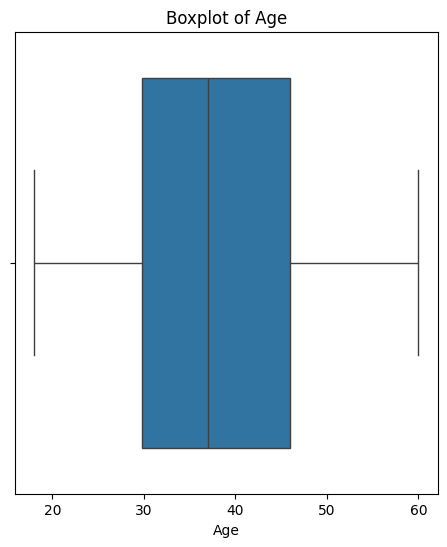

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, x='Age')
plt.title('Boxplot of Age')
plt.show()


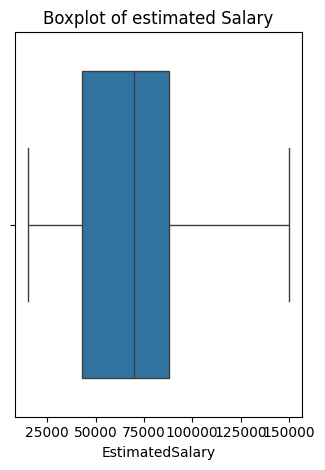

In [16]:
plt.subplot(1,2,2)
sns.boxplot(data=df_cleaned, x='EstimatedSalary')
plt.title('Boxplot of estimated Salary')
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [19]:
df_cleaned = df.copy()

In [22]:
label_encoder = LabelEncoder()
df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])

In [26]:
X=df_cleaned.iloc[:,:-1].values
y=df_cleaned.iloc[:,-1].values

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
print(X_scaled[:5])

[[-0.93657932  1.02020406 -1.78179743 -1.49004624]
 [ 1.66838653  1.02020406 -0.25358736 -1.46068138]
 [-0.32087714 -0.98019606 -1.11320552 -0.78528968]
 [-1.23369247 -0.98019606 -1.01769239 -0.37418169]
 [ 1.57138881  1.02020406 -1.78179743  0.18375059]]


In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled , y, test_size=0.25,random_state=42)

print(f"\nTraining set size:{X_train.shape[0]}")
print(f"Test set size:{X_test.shape[0]}")


Training set size:300
Test set size:100


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn_classifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print(f"\nError rate: {error_rate * 100:.2f}%")
print(f"\nPrecision: {precision * 100:.2f}%")
print(f"\nRecall: {recall * 100:.2f}%")



Confusion Matrix:
[[60  3]
 [ 5 32]]

Accuracy: 92.00%

Error rate: 8.00%

Precision: 91.43%

Recall: 86.49%
